<a href="https://colab.research.google.com/github/navroz-lamba/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/211_guided_project_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression 1: NYC Real Estate

## Survey Responses

- Use *past* sales prices (historical data) to predict the *future* sales price of my condo.

# STEP 1: WRANGLE DATA

## Import

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
# else:
#     DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
import pandas as pd

dtype_dict = {'ZIP_CODE': 'object',
              'YEAR_BUILT': int}

df = pd.read_csv(DATA_PATH+'condos/tribeca.csv', 
                 dtype=dtype_dict, 
                 parse_dates=['SALE_DATE'],
                 index_col='SALE_DATE')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2019-01-03 to 2019-04-30
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NEIGHBORHOOD             90 non-null     object 
 1   BUILDING_CLASS_CATEGORY  90 non-null     object 
 2   ADDRESS                  90 non-null     object 
 3   APARTMENT_NUMBER         90 non-null     object 
 4   ZIP_CODE                 90 non-null     object 
 5   GROSS_SQUARE_FEET        90 non-null     float64
 6   YEAR_BUILT               90 non-null     int64  
 7   SALE_PRICE               90 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 6.3+ KB


In [ ]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,,,,,
2019-01-03,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909,2800000
2019-01-07,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,0,2650000
2019-01-09,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005,1005000
2019-01-10,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,0.0,1088.0,2006,1678000
2019-01-11,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,0,1380000


## EDA

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

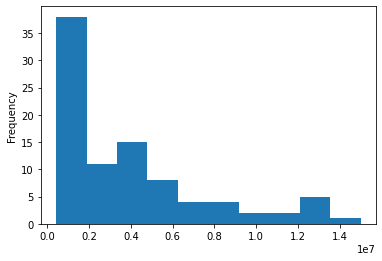

In [ ]:
df['SALE_PRICE'].plot(kind='hist')

In [ ]:
df.describe()['SALE_PRICE']

count           90
mean     3,928,736
std      3,621,996
min        424,770
25%      1,156,552
50%      2,750,000
75%      5,087,500
max     15,000,000
Name: SALE_PRICE, dtype: float64

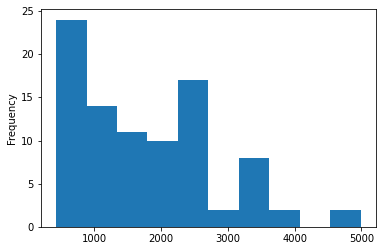

In [ ]:
df['GROSS_SQUARE_FEET'].plot(kind='hist')

In [ ]:
df['BUILDING_CLASS_CATEGORY'].value_counts()

13 CONDOS - ELEVATOR APARTMENTS    90
Name: BUILDING_CLASS_CATEGORY, dtype: int64

# Split the data

## Split your **feature matrix** from your **target vector**

In [ ]:
# Target
y = df['SALE_PRICE']
# Feature Matrix
X = df[['GROSS_SQUARE_FEET']]

In [ ]:
import matplotlib.pyplot as plt

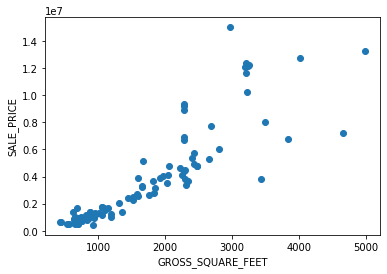

In [ ]:
plt.scatter(X, y)
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE');

## Train-validation split

You can do this split randomly. However, sometimes when you're working with time series, you need to split by using a cutoff date.

In [ ]:
cutoff = '2019-04-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_val, y_val = X.loc[~mask], y.loc[~mask]

# Establish Baseline

Questions to ask yourself:

1. Is this a **supervised** or **unsupervised** learning problem.
2. Is this a **regression** or a **classification** problem?

In [ ]:
y_train

SALE_DATE
2019-01-03    2800000
2019-01-07    2650000
2019-01-09    1005000
2019-01-10    1678000
2019-01-11    1380000
               ...   
2019-03-18     496860
2019-03-20    1275000
2019-03-25     520000
2019-03-25    3920263
2019-03-25    4500000
Name: SALE_PRICE, Length: 65, dtype: int64

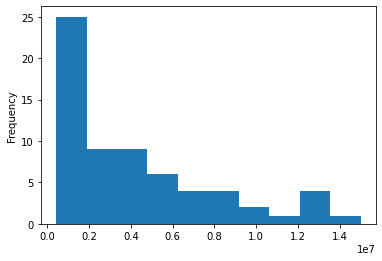

In [ ]:
y_train.plot(kind='hist')

In [ ]:
baseline_guess = y_train.mean()

MAE = abs(y_train - baseline_guess).mean()

print(f'''If my baseline model always predicts {baseline_guess}, 
on average, the prediction will be off by {MAE}.''')

If my baseline model always predicts 4262885.0, 
on average, the prediction will be off by 2974677.6923076925.


# Build Our Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Instantiate your predictor
lr = LinearRegression()

# Train your predictor using the training data
lr.fit(X_train, y_train);

In [ ]:
lr.coef_[0]

3082.9034539449854

In [ ]:
lr.intercept_

-1409040.774567984

# Stretch Goal: Plot the data with our model

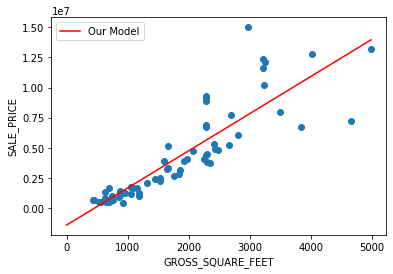

In [ ]:
import numpy as np

X_model = np.linspace(0, X_train['GROSS_SQUARE_FEET'].max(), 50).reshape(-1,1)
# Note how we use the .predict() method with our model
y_pred = lr.predict(X_model)

# Plot our data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_model, y_pred, color='red', label='Our Model')

plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')
plt.legend()

In [ ]:
X_train.max()

GROSS_SQUARE_FEET   4,986
dtype: float64